# Descent

This notebook was automatically generated from the Algorithms for Optimization source code. Each cell generates a figure from the original text. While this code is not optimized for use in lectures, we provide it here to be adapted for such projects. We hope you find it useful.

In [1]:
include("support_code.jl");

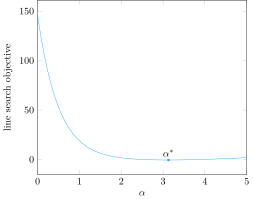

In [2]:
p = let
    f = a -> sin(2 - a) + exp(2 - a + 3 - a) + a - 3
    a_star = 3.12705
    Axis([
            Plots.Linear(f, (0, 5), style = "solid, pastelBlue, mark=none"),
            Plots.Linear([a_star], [f(a_star)], style = "solid, mark=*, mark size=1, mark options={draw=pastelBlue, fill=pastelBlue}"),
            Plots.Node(L"\alpha^*", a_star, f(a_star), style = "above"),
        ], style = "enlarge x limits=0", xlabel = L"\alpha", ylabel = "line search objective", width = "9cm")
end
plot(p)

In [ ]:
using LinearAlgebra
p = let
    f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
    ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

    a = 0.0
    b = 7.0

    axis_xlo = 0
    axis_xhi = 7.5
    ymin = 0.45
    ymax = 1.65

    x = [0.0]
    d = [1.0]
    β = 0.5
    σ = 0.9

    wolfe_1 = α -> f(x + α * d) ≤ f(x) + β * α * ∇(x) ⋅ d

    plots = Plots.Plot[]
    push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none"))
    push!(plots, Plots.Linear(α -> f(x) + α * ∇(x) ⋅ d, (a, 1.5), style = "solid, black, mark=none"))
    push!(plots, Plots.Linear(α -> f(x) + β * α * ∇(x) ⋅ d, (a, b), style = "solid, pastelBlue, mark=none"))
    push!(plots, Plots.Node(L"f(\vect x) + \beta \alpha \nabla_{\vect d}f(\vect x)", 3, f(x) + β * 3 * ∇(x) ⋅ d, style = "above, rotate=-6"))
    push!(plots, Plots.Node(L"f(\vect x) + \alpha \nabla_{\vect d}f(\vect x)", 1.5, f(x) + 1.5 * ∇(x) ⋅ d, style = "right, rotate=-10"))
    push!(plots, Plots.Node(L"f(\vect x + \alpha \vect d)", 5.3, f(x + 5.3 * d), style = "above"))
    push!(plots, Plots.Node("sufficient decrease", 4, f(x + 4 * d), style = "right"))

    α_arr = collect(range(a, stop = b, length = 101))
    b_arr = wolfe_1.(α_arr)
    i = 1
    while i < length(α_arr)
        j = findnext(b -> !b, b_arr, i)
        if j == nothing
            j = length(α_arr)
        else
            j -= 1
        end
        push!(plots, Plots.Linear(f, (α_arr[i], α_arr[j]), style = "solid, ultra thick, pastelBlue, mark=none"))
        if j != length(α_arr)
            i = findnext(b_arr, j + 1)
        else
            i = length(α_arr)
        end
    end

    Axis(plots, width = "13cm", height = "4cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
        style = "axis lines=left, xtick={0}, ytick=\\empty")
end

plot(p)

In [ ]:
using Printf
p = let
  f = x -> (1 - x[1])^2 + 5 * (x[2] - x[1]^2)^2
  ∇f = x -> [2 * (10 * x[1]^3 - 10 * x[1] * x[2] + x[1] - 1), 10 * (x[2] - x[1]^2)]

  xdomain = (-2, 2)
  ydomain = (-2, 2)

  x = [-1.75, -1.75]
  y = f(x)
  δ = 1.0
  θs = range(0, stop = 2π, length = 101)
  η1 = 0.25
  η2 = 0.5
  γ1 = 0.5
  γ2 = 2.0
  δ = 1.0

  plots = Plots.Plot[]
  push!(plots, Plots.Contour(f, xdomain, ydomain, levels = [1, 2, 3, 5, 10, 20, 50, 100], xbins = 600, ybins = 600, style = "width=\\columnwidth"))

  p = 0.5
  β = 1e-4
  α_max = 6.0
  k_max = 7
  for k in 1:k_max
    d = -∇f(x)
    α = α_max
    y, g = f(x), ∇f(x)


    dir = normalize(d, 2)
    push!(plots, Plots.Linear3([x[1], x[1] + 6dir[1]], [x[2], x[2] + 6dir[2]], [10.0, 10.0], style = "solid, red, mark=none"))
    if in(k, [1, 7])
      insert!(plots, 2, Plots.Node(@sprintf("\\footnotesize %d", k), x[1], x[2], axis = "axis cs", style = "anchor=south, circle, fill=white, draw=none"))
    elseif in(k, [2, 6])
      insert!(plots, 2, Plots.Node(@sprintf("\\footnotesize %d", k), x[1], x[2], axis = "axis cs", style = "anchor=north, circle, fill=white, draw=none"))
    elseif in(k, [3, 4])
      insert!(plots, 2, Plots.Node(@sprintf("\\footnotesize %d", k), x[1], x[2], axis = "axis cs", style = "anchor=south east, circle, fill=white, draw=none"))
    elseif in(k, [5])
      insert!(plots, 2, Plots.Node(@sprintf("\\footnotesize %d", k), x[1], x[2], axis = "axis cs", style = "anchor=south west, circle, fill=white, draw=none"))
    end
    while f(x + α * d) ≥ y + β * α * (g ⋅ d)
      x_push = x + d * α
      if xdomain[1] ≤ x_push[1] ≤ xdomain[2] &&
         ydomain[1] ≤ x_push[2] ≤ ydomain[2]
        push!(plots, Plots.Linear3([x[1] + d[1] * α], [x[2] + d[2] * α], [10.0], style = "solid, black, mark=o, mark size=1.25, mark options={solid, draw=black}"))
      end
      α *= p
    end
    push!(plots, Plots.Linear3([x[1], x[1] + d[1] * α], [x[2], x[2] + d[2] * α], [10.0, 10.0], style = "solid, thick, black, mark=*, mark size=1.25, mark options={solid, draw=black}"))
    x += d * α
  end

  insert!(plots, 2, Plots.Node(@sprintf("\\footnotesize %d", k_max + 1), x[1], x[2], axis = "axis cs", style = "anchor=north, circle, fill=white, draw=none"))

  Axis(plots, width = "8cm", height = "8cm", xlabel = L"x_1", ylabel = L"x_2",
    xmin = xdomain[1], xmax = xdomain[2], ymin = ydomain[1], ymax = ydomain[2],
    style = "xtick=\\empty, ytick=\\empty, contour/labels=false, axis equal, view={0}{90}")
end
plot(p)

In [ ]:
p = let
  f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
  ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

  a = 0.0
  b = 7.0

  axis_xlo = 0
  axis_xhi = 7.5
  ymin = 0.15
  ymax = 1.5

  x1 = 0.0
  x = [0.0]
  d = [1.0]
  β = 0.5
  σ = 0.9

  wolfe_1 = α -> f(x + α * d) ≤ f(x) + β * α * ∇(x) ⋅ d

  plots = Plots.Plot[]
  push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none"))
  push!(plots, Plots.Scatter([x1], [f(x1)], style = "mark=*, mark size = 1, mark options={draw=black, fill=black}"))

  x2 = 2.0
  ϕ″ = (∇(x2)-∇(x1))[1] / (x2 - x1)
  x3 = x2 - ∇(x2)[1] / ϕ″ # 3rd point via secant method

  g = α -> f(x2) + (α - x2) * ∇(x2)[1] + (α - x2)^2 * ϕ″ / 2
  push!(plots, Plots.Linear([x2, x2], [ymin, ymax], style = "solid, pastelBlue!40, mark=none"))
  push!(plots, Plots.Linear(g, (a, b), style = "solid, thick, pastelBlue, mark=none"))
  push!(plots, Plots.Scatter([x2], [f(x2)], style = "mark=*, mark size = 1, mark options={draw=black, fill=black}"))

  x2 = 2.82
  ϕ″ = (∇(x2)-∇(x1))[1] / (x2 - x1)
  x3 = x2 - ∇(x2)[1] / ϕ″ # 3rd point via secant method

  g = α -> f(x2) + (α - x2) * ∇(x2)[1] + (α - x2)^2 * ϕ″ / 2
  push!(plots, Plots.Linear([x2, x2], [ymin, ymax], style = "solid, pastelRed!40, mark=none"))
  push!(plots, Plots.Linear(g, (a, b), style = "solid, thick, pastelRed, mark=none"))
  push!(plots, Plots.Scatter([x2], [f(x2)], style = "mark=*, mark size = 1, mark options={draw=black, fill=black}"))
  push!(plots, Plots.Scatter([x3], [g(x3)], style = "mark=*, mark size = 1.25, mark options={draw=red, fill=red}"))
  push!(plots, Plots.Node("\\small minimum of second-order approximation", x3, g(x3), style = "below left"))

  Axis(plots, width = "13cm", height = "5cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
    style = "clip marker paths, axis lines=left, xtick={0}, ytick=\\empty")
end

plot(p)

In [ ]:
p = let
  f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
  ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

  a = 0.0
  b = 7.0

  axis_xlo = 0
  axis_xhi = 7.5
  ymin = 0.45
  ymax = 1.5

  x = [0.0]
  d = [1.0]
  β = 0.5
  σ = 0.9

  wolfe_2 = α -> ∇(x + α * d) ⋅ d ≥ σ * ∇(x) ⋅ d

  plots = Plots.Plot[]
  push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none"))
  push!(plots, Plots.Linear(α -> f(x) + α * ∇(x) ⋅ d, (a, 1.5), style = "solid, black, mark=none"))
  push!(plots, Plots.Linear(α -> f(x) + σ * α * ∇(x) ⋅ d, (a, 1.5), style = "solid, pastelPurple, thick, mark=none"))
  push!(plots, Plots.Node(L"f(\vect x) + \alpha \nabla_{\vect d}f(\vect x)", 1.5, f(x) + 1.5 * ∇(x) ⋅ d, style = "below right, rotate=-14"))
  push!(plots, Plots.Node(L"f(\vect x) +  \alpha \sigma \nabla_{\vect d}f(\vect x)", 1.5, f(x) + 1.5 * σ * ∇(x) ⋅ d, style = "above right, rotate=-14"))
  push!(plots, Plots.Node("reduced curvature", 4, f(x + 4 * d), style = "right"))

  α_arr = collect(range(a, stop = b, length = 101))
  b_arr = wolfe_2.(α_arr)
  i = findfirst(b_arr)
  Δx = 0.75
  while i < length(α_arr)
    j = findnext(b -> !b, b_arr, i)
    if j == nothing
      j = length(α_arr)
    else
      j -= 1
    end
    push!(plots, Plots.Linear(f, (α_arr[i], α_arr[j]), style = "solid, ultra thick, pastelPurple, mark=none"))

    y = f(x .+ α_arr[i])
    g = ∇(x .+ α_arr[i]) ⋅ d
    push!(plots, Plots.Linear([α_arr[i] - Δx, α_arr[i] + Δx], [y - g * Δx, y + g * Δx], style = "solid, pastelPurple, thick, mark=none"))

    if j != length(α_arr)

      y = f(x .+ α_arr[j])
      g = ∇(x .+ α_arr[j]) ⋅ d
      push!(plots, Plots.Linear([α_arr[j] - Δx, α_arr[j] + Δx], [y - g * Δx, y + g * Δx], style = "solid, pastelPurple, thick, mark=none"))

      i = something(findnext(b_arr, j + 1), 0)
    else
      i = length(α_arr)
    end
  end

  Axis(plots, width = "13cm", height = "5cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
    style = "axis lines=left, xtick={0}, ytick=\\empty")
end

plot(p)

In [ ]:
p = let
  f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
  ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

  a = 0.0
  b = 7.0

  axis_xlo = 0
  axis_xhi = 7.5
  ymin = 0.45
  ymax = 1.5

  x = [0.0]
  d = [1.0]
  β = 0.5
  σ = 0.9

  wolfe_2 = α -> abs(∇(x + α * d) ⋅ d) ≤ -σ * ∇(x) ⋅ d

  plots = Plots.Plot[]
  push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none"))
  push!(plots, Plots.Linear(α -> f(x) + α * ∇(x) ⋅ d, (a, 1.5), style = "solid, black, mark=none"))
  push!(plots, Plots.Linear(α -> f(x) + σ * α * ∇(x) ⋅ d, (a, 1.5), style = "solid, pastelSeaGreen, thick, mark=none"))
  push!(plots, Plots.Node(L"f(\vect x) + \alpha \nabla_{\vect d}f(\vect x)", 1.5, f(x) + 1.5 * ∇(x) ⋅ d, style = "below right, rotate=-14"))
  push!(plots, Plots.Node(L"f(\vect x) +  \alpha \sigma \nabla_{\vect d}f(\vect x)", 1.5, f(x) + 1.5 * σ * ∇(x) ⋅ d, style = "above right, rotate=-14"))

  α_arr = collect(range(a, stop = b, length = 101))
  b_arr = wolfe_2.(α_arr)
  i = findfirst(b_arr)
  Δx = 0.75
  while i < length(α_arr)
    j = findnext(b -> !b, b_arr, i)
    if j == nothing
      j = length(α_arr)
    else
      j -= 1
    end
    push!(plots, Plots.Linear(f, (α_arr[i], α_arr[j]), style = "solid, ultra thick, pastelSeaGreen, mark=none"))

    y = f(x .+ α_arr[i])
    g = ∇(x .+ α_arr[i]) ⋅ d
    push!(plots, Plots.Linear([α_arr[i] - Δx, α_arr[i] + Δx], [y - g * Δx, y + g * Δx], style = "solid, pastelSeaGreen, thick, mark=none"))

    if j != length(α_arr)

      y = f(x .+ α_arr[j])
      g = ∇(x .+ α_arr[j]) ⋅ d
      push!(plots, Plots.Linear([α_arr[j] - Δx, α_arr[j] + Δx], [y - g * Δx, y + g * Δx], style = "solid, pastelSeaGreen, thick, mark=none"))

      i = something(findnext(b_arr, j + 1), 0)
    else
      i = length(α_arr)
    end
  end

  Axis(plots, width = "13cm", height = "5cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
    style = "axis lines=left, xtick={0}, ytick=\\empty")
end

plot(p)

In [ ]:
p = let
  f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
  ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

  a = 0.0
  b = 10.0

  axis_xlo = a
  axis_xhi = b
  ymin = 0.45
  ymax = 1.65

  x = [0.0]
  d = [1.0]
  β = 0.5
  σ = 0.9

  # condition holds once one of the following is true
  cond1 = α_hi -> ∇(x + α_hi * d) ⋅ d >= 0
  cond2 = α_hi -> f(x + α_hi * d) > f(x) + β * α_hi * ∇(x) ⋅ d
  cond3 = α_hi -> f(x + α_hi * d) >= f(x)
  wolfe_1 = α -> f(x + α * d) ≤ f(x) + β * α * ∇(x) ⋅ d
  wolfe_2 = α -> ∇(x + α * d) ⋅ d ≥ σ * ∇(x) ⋅ d
  wolfe = α -> wolfe_1(α) && wolfe_2(α)

  plots = Plots.Plot[]
  push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none, forget plot"))
  push!(plots, Plots.Linear(α -> f(x) + β * α * ∇(x) ⋅ d, (a, b), style = "solid, gray, mark=none, forget plot"))
  push!(plots, Plots.Linear([a, b], [f(x), f(x)], style = "solid, gray, mark=none, forget plot"))

  function plot_cond_region(cond, offset, color, title)
    α_arr = collect(range(a, stop = b, length = 150))
    b_arr = cond.(α_arr)
    i = findfirst(b_arr)
    Δx = 0.75
    first = true
    while i < length(α_arr)
      j = findnext(b -> !b, b_arr, i)
      if j == nothing
        j = length(α_arr)
      else
        j -= 1
      end

      push!(plots, Plots.Linear(α -> f(α) + offset, (α_arr[i], α_arr[j]), style = "draw=none, mark=none, name path=A, forget plot"))
      push!(plots, Plots.Linear(f, (α_arr[i], α_arr[j]), style = "draw=none, mark=none, name path=B, forget plot"))
      if first
        push!(plots, Plots.Command("\\addplot[$(color)] fill between[of=A and B]; \\addlegendentry{$title}"))
      else
        push!(plots, Plots.Command("\\addplot[$(color), forget plot] fill between[of=A and B]"))
      end
      first = false

      if j != length(α_arr)
        i = findnext(b_arr, j + 1)
        if i == nothing
          i = length(α_arr)
        end
      else
        i = length(α_arr)
      end
    end
  end

  plot_cond_region(cond3, 0.1, "pastelGreen!50", L"f(\vect x + \alpha \vect d) \geq f(\vect x)")
  plot_cond_region(cond2, 0.066, "pastelBlue!75", L"f(\vect x + \alpha \vect d) > f(\vect x) + \beta \alpha \nabla_{\vect d}f(\vect x)")
  plot_cond_region(cond1, 0.033, "pastelPurple", L"\nabla f(\vect x + \alpha \vect d) \geq \vect 0")
  plot_cond_region(wolfe, -0.033, "pastelRed", "Wolfe conditions satisfied")

  push!(plots, Plots.Node(L"f(\vect x) + \beta \alpha \nabla_{\vect d}f(\vect x)", 3.25, f(x) + β * 3.25 * ∇(x) ⋅ d - 0.02, style = "above, rotate=-12"))
  push!(plots, Plots.Node(L"y = f(\vect x)", b / 2, f(x), style = "above"))

  Axis(plots, width = "11.75cm", height = "5cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
    style = "axis lines=left, xtick={0}, ytick=\\empty, legend pos=outer north east")
end
plot(p)

In [ ]:
p = let
  f = x -> 1.5 - exp(-0.25 * (x[1] - 3)^2) - 0.75 * exp(-0.5 * (x[1] - 7)^2)
  ∇ = x -> [0.75 * exp(-0.5 * (x[1] - 7)^2) * (x[1] - 7) + exp(-0.25 * (x[1] - 3)^2) * 0.5 * (x[1] - 3)]

  a = 0.0
  b = 10.0

  axis_xlo = a
  axis_xhi = b
  ymin = 0.45
  ymax = 1.65

  x = [0.0]
  d = [1.0]
  β = 0.5
  σ = 0.9

  plots = Plots.Plot[]
  push!(plots, Plots.Linear(f, (a, b), style = "solid, thick, black, mark=none, forget plot"))

  # condition holds once one of the following is true
  cond1 = α_hi -> ∇(x + α_hi * d) ⋅ d >= 0
  cond2 = α_hi -> f(x + α_hi * d) > f(x) + β * α_hi * ∇(x) ⋅ d
  cond3 = α_hi -> f(x + α_hi * d) >= f(x)

  function plot_cond_region(cond, offset, color, title)
    α_arr = collect(range(a, stop = b, length = 150))
    b_arr = cond.(α_arr)
    i = findfirst(b_arr)
    Δx = 0.75
    first = true
    while i < length(α_arr)
      j = findnext(b -> !b, b_arr, i)
      if j == nothing
        j = length(α_arr)
      else
        j -= 1
      end

      push!(plots, Plots.Linear(α -> f(α) + offset, (α_arr[i], α_arr[j]), style = "draw=none, mark=none, name path=A, forget plot"))
      push!(plots, Plots.Linear(f, (α_arr[i], α_arr[j]), style = "draw=none, mark=none, name path=B, forget plot"))

      if first
        push!(plots, Plots.Command("\\addplot[$(color)] fill between[of=A and B]; \\addlegendentry{$title}"))
      else
        push!(plots, Plots.Command("\\addplot[$(color), forget plot] fill between[of=A and B]"))
      end
      first = false
      first = false

      if j != length(α_arr)
        i = findnext(b_arr, j + 1)
        if i == nothing
          i = length(α_arr)
        end
      else
        i = length(α_arr)
      end
    end
  end

  plot_cond_region(cond3, 0.1, "pastelGreen!50", L"f(\vect x + \alpha \vect d) \geq f(\vect x)")
  plot_cond_region(cond2, 0.066, "pastelBlue!75", L"f(\vect x + \alpha \vect d) > f(\vect x) + \beta \alpha \nabla_{\vect d}f(\vect x)")
  plot_cond_region(cond1, 0.033, "pastelPurple", L"\nabla f(\vect x + \alpha \vect d) \geq \vect 0")

  k = 0
  α = 0.6
  y0, g0, y_prev, α_prev = f(x), ∇(x) ⋅ d, NaN, 0
  while true
    k += 1
    y = f(x + α * d)

    push!(plots, Plots.Linear([α, α], [0, y], style = "solid, black, mark=*, mark options={draw=black, fill=white}"))
    push!(plots, Plots.Node("\$\\alpha^{($k)}\$", α, y + 0.06, style = "above"))
    if y > y0 + β * α * g0 || (!isnan(y_prev) && y >= y_prev)

      α = 0.75α # bisection
      y = f(α)
      push!(plots, Plots.Linear([α, α], [0, y], style = "solid, pastelRed, mark=*, mark options={draw=pastelRed, fill=white}"))
      push!(plots, Plots.Node("\$\\alpha^{($(k+1))}\$", α, y + 0.06, style = "above"))

    end
    g = ∇(x + α * d) ⋅ d
    if abs(g) <= -σ * g0
      break
    elseif g >= 0
      break
    end
    α_prev, α = α, 2α
    y_prev = y
  end


  Axis(plots, width = "11.75cm", height = "5cm", ymin = ymin, ymax = ymax, xmin = axis_xlo, xmax = axis_xhi, ylabel = L"y", xlabel = L"\alpha",
    style = "axis lines=left, xtick=\\empty, ytick=\\empty, legend pos=outer north east")
end
plot(p)

In [ ]:
using Random
using Optim

function solve_trust_region_subproblem(∇f, H, x0, δ)

  Hx0 = H(x0)
  ∇fx0 = ∇f(x0)

  # Unconstrained
  f = x -> ∇fx0 ⋅ (x - x0) + ((x - x0)' * Hx0) ⋅ (x - x0) / 2

  # Constrained with huge penalty
  g = x -> norm(x - x0) <= δ ? f(x) : 9999999.0

  result = optimize(g, x0, NelderMead())

  return (result.minimizer, result.minimum)
end

p = let
  f = x -> (1 - x[1])^2 + 5 * (x[2] - x[1]^2)^2
  ∇f = x -> [2 * (10 * x[1]^3 - 10 * x[1] * x[2] + x[1] - 1), 10 * (x[2] - x[1]^2)]
  H = x -> [-20*(x[2]-x[1]^2)+40*x[1]^2+2 -20*x[1]
    -20*x[1] 10]

  xdomain = (-2, 2)
  ydomain = (-2, 2)

  x₀ = [-1.75, -1.75]
  x = deepcopy(x₀)
  y = f(x)
  δ = 1.0
  θs = range(0, stop = 2π, length = 101)
  η1 = 0.25
  η2 = 0.5
  γ1 = 0.5
  γ2 = 2.0
  δ = 1.0

  plots = Plots.Plot[]
  push!(plots, Plots.Contour(f, xdomain, ydomain, levels = [1, 2, 3, 5, 10, 20, 50, 100], xbins = 600, ybins = 600, style = "width=\\columnwidth"))

  Random.seed!(0) # just in case
  k_max = 10
  for k in 1:k_max+1

    opacity = 0.1 + 0.9 * (k - 1) / (k_max - 1)
    push!(plots, Plots.Linear3([x[1]], [x[2]], [10.0], style = "black, mark=*, mark options={solid, draw=black, fill=black}, opacity=$opacity"))
    push!(plots, Plots.Linear3([x[1] + δ * cos(θ) for θ in θs], [x[2] + δ * sin(θ) for θ in θs], [10 for θ in θs], style = "solid, thick, black, mark=none, opacity=$opacity"))

    x′, y′ = solve_trust_region_subproblem(∇f, H, x, δ)
    r = (y - f(x′)) / (y - y′)
    if r < η1
      δ *= γ1
    else
      x, y = x′, f(x′)
      if r > η2
        δ *= γ2
      end
    end
  end

  push!(plots, Plots.Node("\$\\vect x^{(1)}\$", x₀[1] + 0.15, x₀[2], style = "right"))
  push!(plots, Plots.Node("\$\\vect x^{(10)}\$", x[1], x[2] + 0.05, style = "above"))

  Axis(plots, width = "8cm", height = "8cm", xlabel = L"x_1", ylabel = L"x_2",
    xmin = xdomain[1], xmax = xdomain[2], ymin = ydomain[1], ymax = ydomain[2],
    style = "xtick=\\empty, ytick=\\empty, contour/labels=false, axis equal, view={0}{90}")
end
plot(p)